# 1. Calculating Bias and Variance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
f = open('Q1_data/data.pkl','rb')
data = pickle.load(f)
data.shape

(5000, 2)

Split the dataset into
training and testing(90:10 split). Now divides the train set into 10 equal
parts randomly, so that you will get 10 different dataset to train your model

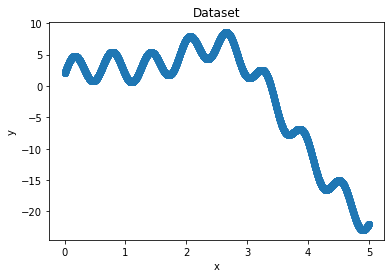

In [ ]:
#split data into train and test
x=data [:,0]
y=data [:,1]
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state= 10 , shuffle=True)

(4500,)
(4500,)


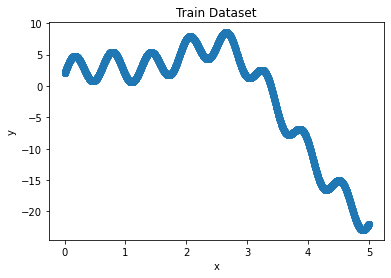

In [ ]:
print(x_train.shape)
print(y_train.shape)
plt.plot(x_train,y_train,'o')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Dataset')
plt.show()

In [ ]:
# training data partition
parts = 10
xparts = np.array_split(x_train,parts)
yparts = np.array_split(y_train,parts)
xparts[0].shape 

(450,)

In [ ]:
print([i.shape for i in xparts])
print([i.shape for i in yparts])

[(450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,)]
[(450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,)]


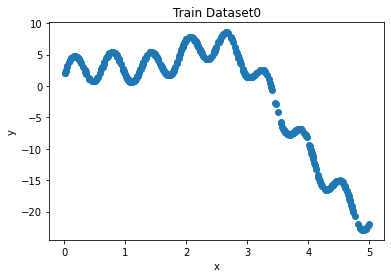

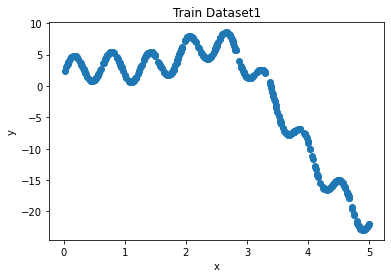

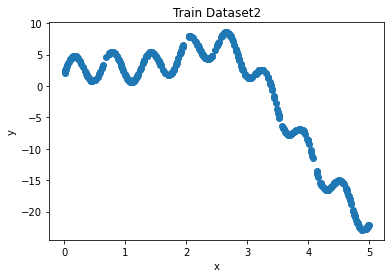

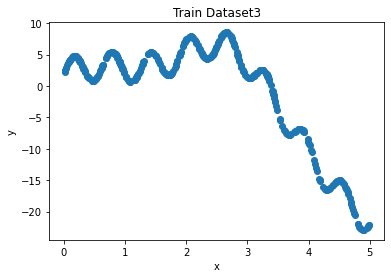

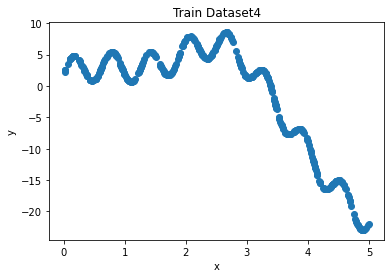

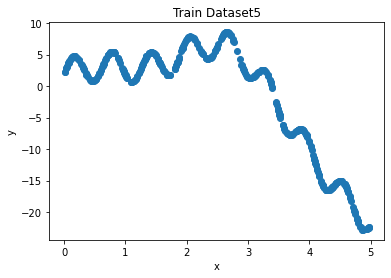

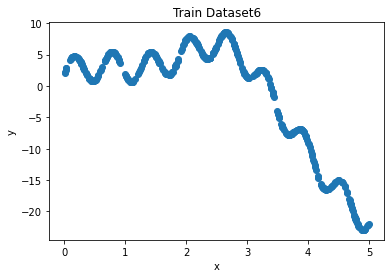

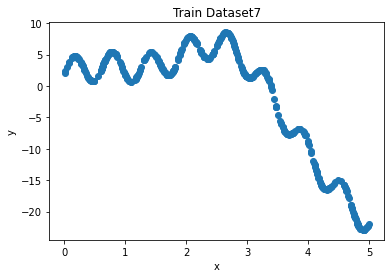

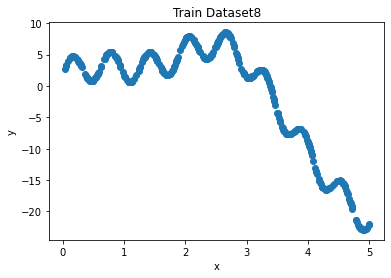

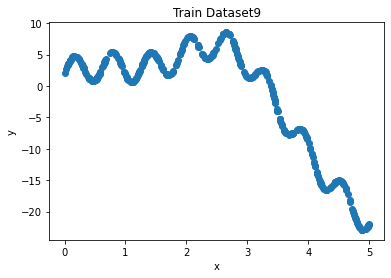

In [ ]:
# Draw and plot the training datasets
for i in range(0,10):
    plt.scatter(xparts[i], yparts[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Train Dataset'+str(i))
    plt.show()

After re-sampling data, you have 11 different datasets ( 10 train sets and 1
test set). Train a linear classifier on each of the 10 train set separately, so
that you have 10 different classifiers or models. You have 10 different models
or classifiers trained separately on 10 different training set, so now you can
calculate the bias and variance of the model.

- 1.2.1 y = mx + c
- 1.2.2 y = ax2 + bx + c
- 1.2.3 y = ax4 + bx3 + cx2 + dx + e

And so on up till polynomial of degree 9.

# Note: Whenever we are talking about the bias and variance of model, it refers to the average bias and variance of the model over all the test points.

In [ ]:
errors = []
bias = []
variance = []
variance2 = []
bias_square = []

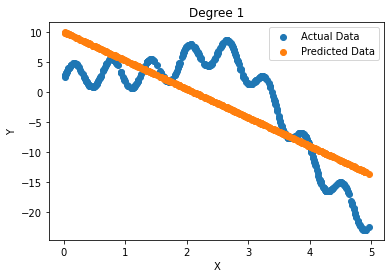

predict shape is 10
errors shape is 1
variance shape is 1


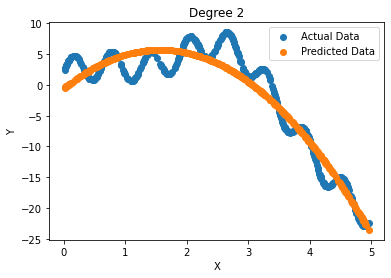

predict shape is 10
errors shape is 2
variance shape is 2


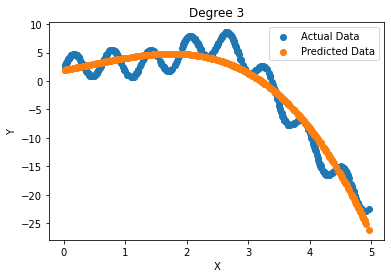

predict shape is 10
errors shape is 3
variance shape is 3


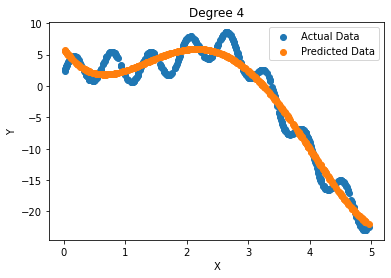

predict shape is 10
errors shape is 4
variance shape is 4


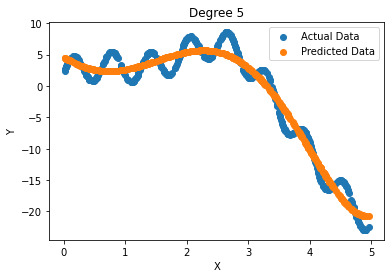

predict shape is 10
errors shape is 5
variance shape is 5


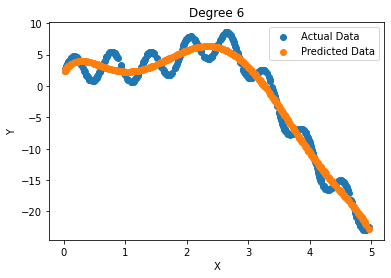

predict shape is 10
errors shape is 6
variance shape is 6


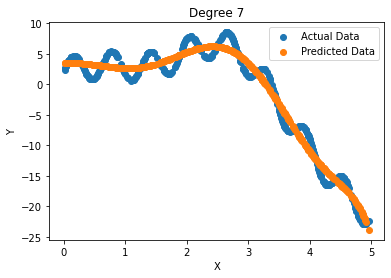

predict shape is 10
errors shape is 7
variance shape is 7


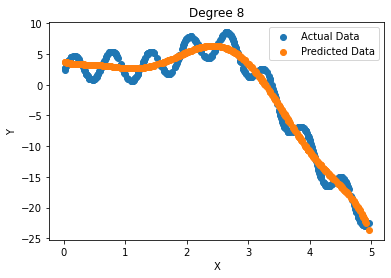

predict shape is 10
errors shape is 8
variance shape is 8


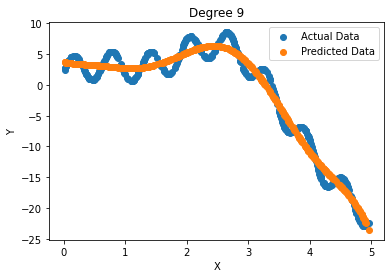

predict shape is 10
errors shape is 9
variance shape is 9


In [ ]:
for i in range(1,10):
    diffs = []
    diffs_abs = []
    predict = []
    error = []
    
    poly = PolynomialFeatures(degree = i)
    test_x = poly.fit_transform(x_test.reshape(-1,1))
    # create different models for every partition , same equation on different part of the data (so given 10 parts)
    for j in range(parts):      
        train_x = poly.fit_transform(xparts[j].reshape(-1,1))

        regressor = linear_model.LinearRegression()
        regressor.fit(train_x , yparts[j])
        prediction = regressor.predict(test_x)

        diffs.append(prediction - y_test)
        diffs_abs.append(abs(prediction - y_test))
        predict.append(prediction)
        error.append(mean_squared_error(y_test , prediction))

        if j == 0:
        # make a plot for this model using the 1st partitions, we have 10 models trained with 10 different datasets (100 total), plot the first one of each
            plt.figure(i)
            plt.scatter(x_test, y_test, label='Actual Data')
            plt.legend()
            plt.scatter(x_test, prediction, label='Predicted Data')
            plt.legend()
            plt.xlabel("X") 
            plt.ylabel("Y") 
            plt.title('Degree ' + str(i))
            plt.show(i)

    print("predict shape is "+ str(len(predict)))
    errors.append(np.mean(error))
    print("errors shape is "+ str(len(errors)))

    diffs = np.array(diffs)
    diffs = np.transpose(diffs)

    diffs_abs = np.array(diffs_abs)
    diffs_abs = np.transpose(diffs_abs)

    predict = np.array(predict)
    bias_abs = np.mean(np.mean(diffs_abs,1))
    bias_sq = np.mean(np.mean(diffs,1)**2)

    bias.append(bias_abs)
    bias_square.append(bias_sq)

    variance.append(np.mean((predict - np.mean(predict,0))**2))
    print("variance shape is "+ str(len(variance)))

   Degree     Errors      Bias  Variance  Irreducible Error
0       1  32.652795  4.853416  0.186895      -7.105427e-15
1       2   6.451925  2.063647  0.040818       0.000000e+00
2       3   5.531333  1.938769  0.051550       8.881784e-16
3       4   3.341692  1.558290  0.032102       0.000000e+00
4       5   3.134447  1.534108  0.040935       4.440892e-16
5       6   2.843760  1.501495  0.034522       0.000000e+00
6       7   2.651669  1.463835  0.033374       0.000000e+00
7       8   2.629938  1.459765  0.040453      -4.440892e-16
8       9   2.635338  1.456096  0.042156       4.440892e-16


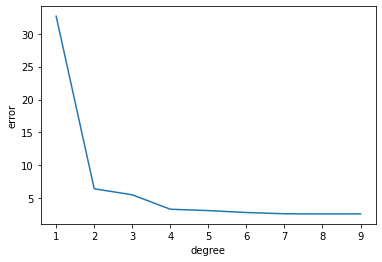

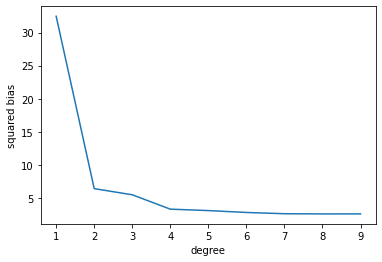

([<matplotlib.axis.XTick at 0x161acd563d0>,
 <a list of 9 Text major ticklabel objects>)

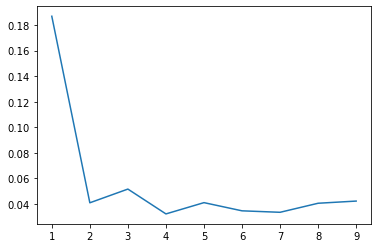

In [ ]:
errors = np.array(errors)
bias_square = np.array(bias_square)
variance = np.array(variance)
irreducible_error = np.array(errors - (bias_square+variance))

df = pd.DataFrame({ 'Degree': [i for i in range(1, 10)],
    'Errors': errors, 'Bias': bias, 'Variance': variance,'Irreducible Error': irreducible_error })
print(df)

plt.close()

plt.figure(10)
plt.plot(range(1,10),errors)
plt.xticks(list(range(1, 10)))
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

plt.figure(22)
plt.plot(range(1,10),bias_square)
plt.xticks(list(range(1, 10)))
plt.xlabel('degree')
plt.ylabel('squared bias')
plt.show()

plt.figure(23)
plt.plot(range(1,10),variance)
plt.xticks(list(range(1, 10)))

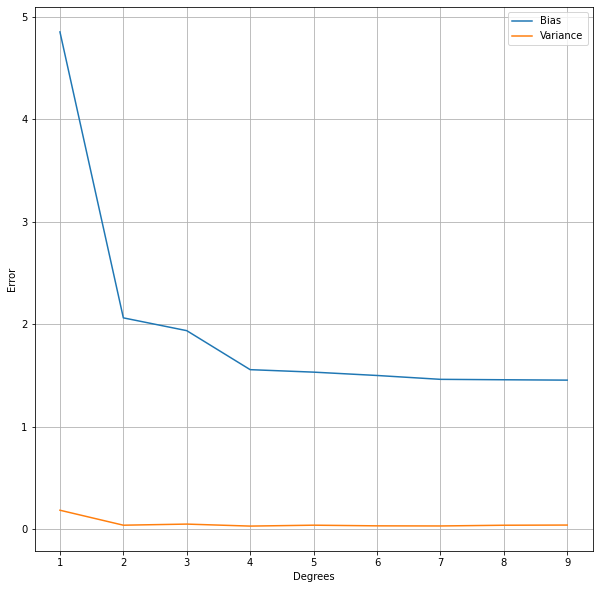

In [ ]:
degrees=list(range(1,10))
plt.figure(figsize=(10,10))
plt.plot(degrees,bias)
plt.plot(degrees,variance)
plt.xlabel('Degrees')
plt.ylabel('Error')
plt.legend(['Bias','Variance'])
plt.grid();

In [ ]:
df

,Degree,Errors,Bias,Variance,Irreducible Error
0,1,32.652795,4.853416,0.186895,-7.105427e-15
1,2,6.451925,2.063647,0.040818,0.000000e+00
2,3,5.531333,1.938769,0.051550,8.881784e-16
3,4,3.341692,1.558290,0.032102,0.000000e+00
4,5,3.134447,1.534108,0.040935,4.440892e-16
5,6,2.843760,1.501495,0.034522,0.000000e+00
6,7,2.651669,1.463835,0.033374,0.000000e+00
7,8,2.629938,1.459765,0.040453,-4.440892e-16
8,9,2.635338,1.456096,0.042156,4.440892e-16


# Report:
From the above result of df we found that the bias and variance changes when we change the model order.also We see that the bias decreases with the increase of d until we reach d=4.

As we want to decrease the variance to make as accurate of an estimation as possible. So the smallest value of the variance is at d=4 too.

# so we find "the best order of our model is using d=4".

**************************************************************